# Diabetes Detection Using KNN Algorithm for Binary Clasification

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [2]:
# Importing Training data

dfx_train = pd.read_csv('./Diabetes Detection Datasets/Training Data/Diabetes_XTrain.csv')
dfy_train = pd.read_csv('./Diabetes Detection Datasets/Training Data/Diabetes_YTrain.csv')

print(dfx_train.shape, dfx_train.columns, dfy_train.shape, dfy_train.columns, sep='\n\n')

(576, 8)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

(576, 1)

Index(['Outcome'], dtype='object')


In [3]:
print(dfx_train.head(5), dfy_train.head(5), sep='\n\n')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  

   Outcome
0        1
1        0
2        1
3        1
4        0


In [4]:
# Generating numpy arrays from the DataFrames

X_train = dfx_train.values
Y_train = dfy_train.values[:, -1]

print(X_train.shape, type(X_train), X_train, Y_train.shape, type(Y_train), Y_train, sep='\n\n')

(576, 8)

<class 'numpy.ndarray'>

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]

(576,)

<class 'numpy.ndarray'>

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1

### Plotting bar graphs showing number of classes and no. of examples in each class


In [5]:
# Lets first combining the two DataFrames imported from the Training Dataset earlier : dfx_train and dfy_train to df

df = dfx_train
df['Outcome'] = dfy_train
df = df[df['Outcome'] == 1]    # Selecting only those rows/records whose Outcome value is 1, i.e., Suffering from Diabetes
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
5,7,100,0,0,0,30.0,0.484,32,1
8,3,169,74,19,125,29.9,0.268,31,1
...,...,...,...,...,...,...,...,...,...
556,2,146,0,0,0,27.5,0.240,28,1
560,10,129,62,36,0,41.2,0.441,38,1
563,3,141,0,0,0,30.0,0.761,27,1
567,12,151,70,40,271,41.8,0.742,38,1


0     29
3     23
4     22
1     21
7     18
2     15
8     14
9     13
6     12
5     12
10     9
13     4
11     4
14     2
12     2
17     1
Name: Pregnancies, dtype: int64


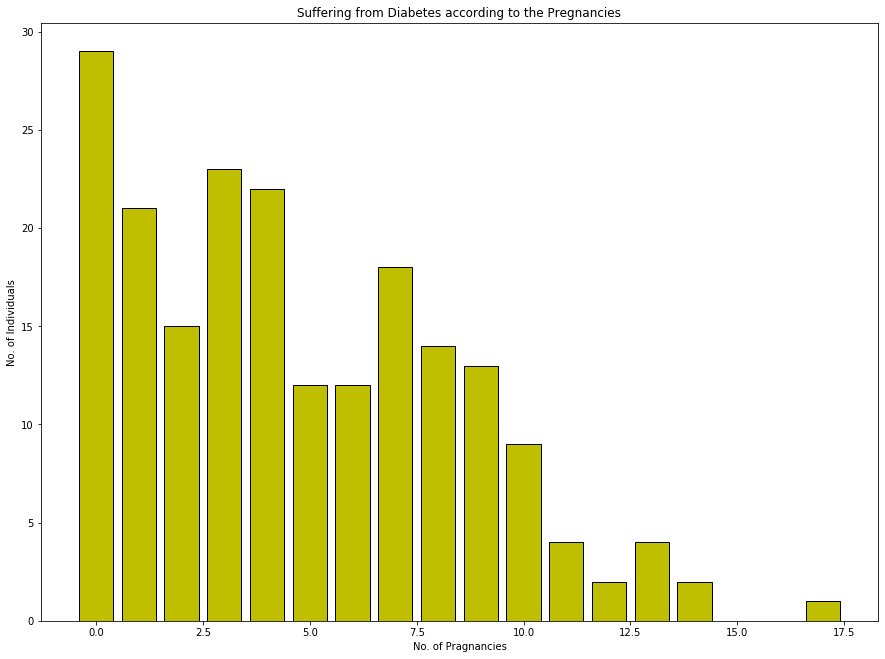

In [6]:
# Plotting the bar graph of people suffering from Diabetes according to their Pregnancy value count

# Printing the Pregnancy Value Groups with the count of cases for each groups
print(df['Pregnancies'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['Pregnancies'].value_counts().index, df['Pregnancies'].value_counts().values, color='y', edgecolor='k')
plt.title('Suffering from Diabetes according to the Pregnancies')
plt.xlabel('No. of Pragnancies')
plt.ylabel('No. of Individuals')
plt.show()

125    7
128    6
173    5
129    5
109    5
      ..
141    1
138    1
137    1
136    1
0      1
Name: Glucose, Length: 92, dtype: int64


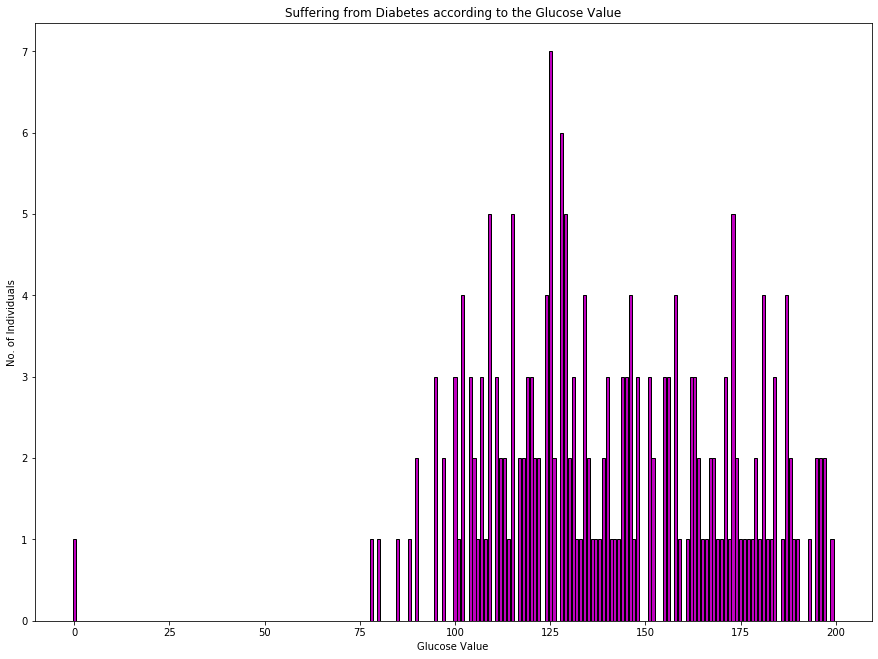

In [7]:
# Plotting the bar graph of people suffering from Diabetes according to their Glucose

# Printing the Glucose Value Groups with the count of cases for each groups
print(df['Glucose'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['Glucose'].value_counts().index, df['Glucose'].value_counts().values, color='m', edgecolor='k')
plt.title('Suffering from Diabetes according to the Glucose Value')
plt.xlabel('Glucose Value')
plt.ylabel('No. of Individuals')
plt.show()

70     18
76     14
0      13
74     13
78     13
72     12
82     10
88     10
80      9
90      8
84      8
86      7
64      7
66      7
68      7
62      6
60      5
50      5
92      3
52      3
85      3
110     2
104     2
98      2
48      1
30      1
54      1
56      1
40      1
114     1
58      1
65      1
94      1
96      1
100     1
102     1
106     1
75      1
Name: BloodPressure, dtype: int64


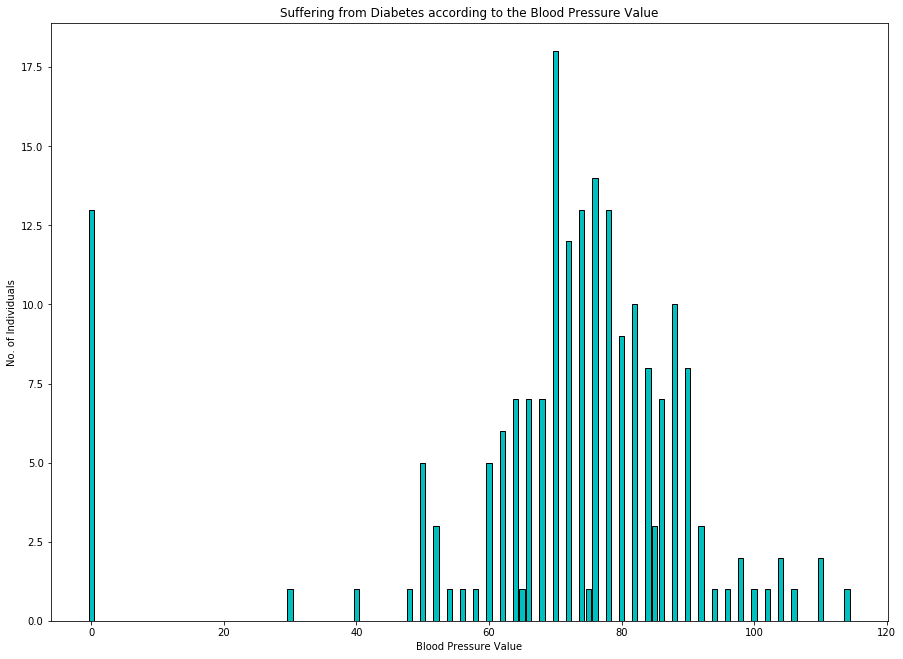

In [8]:
# Plotting the bar graph of people suffering from Diabetes according to their BloodPressure

# Printing the BloodPressure Value Groups with the count of cases for each groups
print(df['BloodPressure'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['BloodPressure'].value_counts().index, df['BloodPressure'].value_counts().values, color='c', edgecolor='k')
plt.title('Suffering from Diabetes according to the Blood Pressure Value')
plt.xlabel('Blood Pressure Value')
plt.ylabel('No. of Individuals')
plt.show()

0     67
39     7
30     7
32     7
37     7
27     6
33     6
25     5
35     5
36     5
31     5
42     5
40     4
18     4
22     4
24     4
46     4
28     3
19     3
23     3
49     3
41     3
26     3
29     3
45     3
44     3
48     2
14     2
38     2
43     2
20     2
21     2
34     2
47     2
56     1
17     1
15     1
13     1
12     1
63     1
Name: SkinThickness, dtype: int64


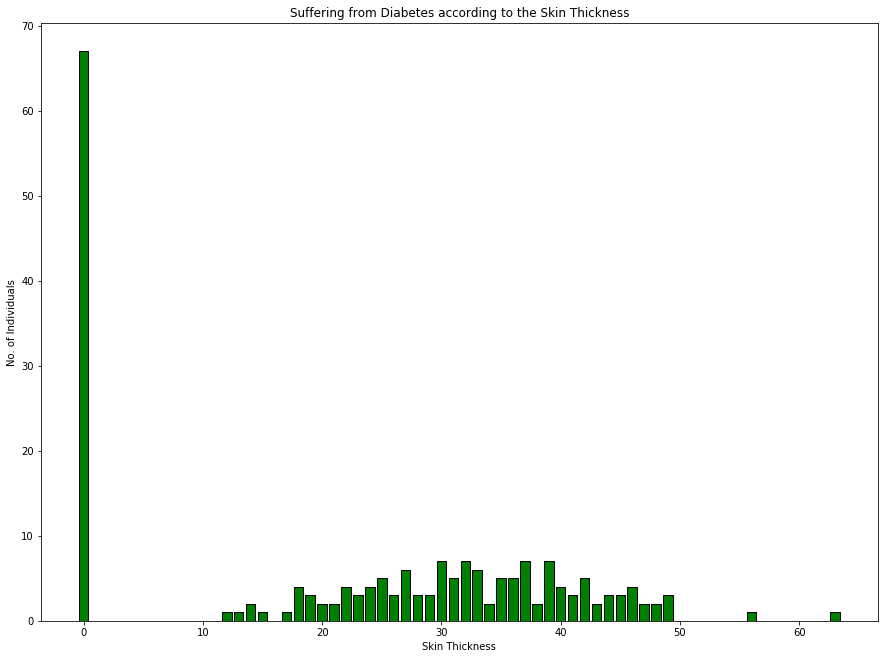

In [9]:
# Plotting the bar graph of people suffering from Diabetes according to their SkinThickness

# Printing the SkinThickness Groups with the count of cases for each groups
print(df['SkinThickness'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['SkinThickness'].value_counts().index, df['SkinThickness'].value_counts().values, color='g', edgecolor='k')
plt.title('Suffering from Diabetes according to the Skin Thickness')
plt.xlabel('Skin Thickness')
plt.ylabel('No. of Individuals')
plt.show()

0      103
180      4
130      3
194      2
115      2
      ... 
140      1
392      1
135      1
250      1
132      1
Name: Insulin, Length: 79, dtype: int64


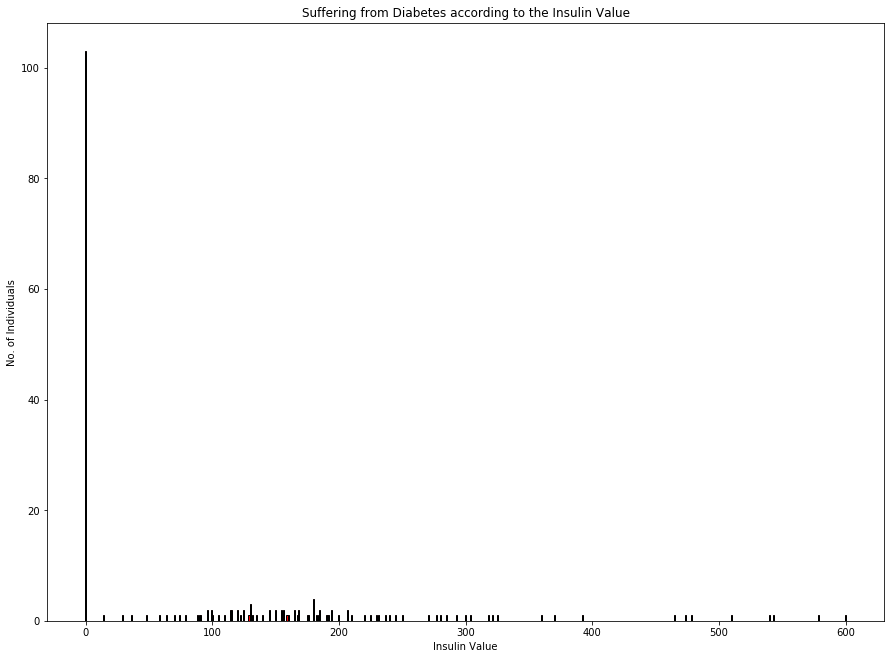

In [10]:
# Plotting the bar graph of people suffering from Diabetes according to their Insulin Values

# Printing the Insulin Value Groups with the count of cases for each groups
print(df['Insulin'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['Insulin'].value_counts().index, df['Insulin'].value_counts().values, color='r', edgecolor='k')
plt.title('Suffering from Diabetes according to the Insulin Value')
plt.xlabel('Insulin Value')
plt.ylabel('No. of Individuals')
plt.show()

31.6    6
33.3    5
32.9    5
30.0    4
33.6    4
       ..
34.8    1
30.3    1
52.3    1
27.9    1
53.2    1
Name: BMI, Length: 127, dtype: int64


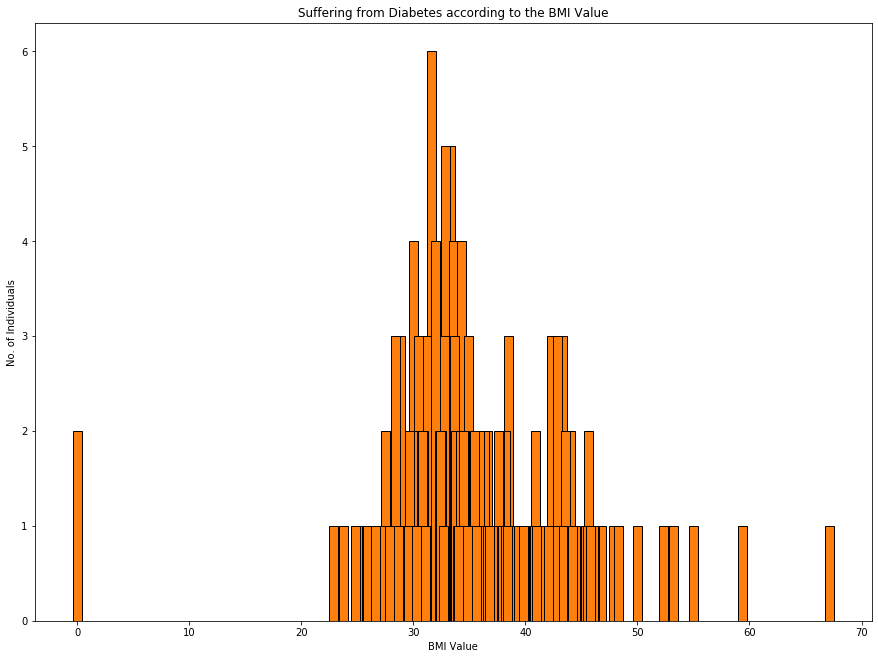

In [11]:
# Plotting the bar graph of people suffering from Diabetes according to their BMI Values

# Printing the BMI Value Groups with the count of cases for each groups
print(df['BMI'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['BMI'].value_counts().index, df['BMI'].value_counts().values, color='tab:orange', edgecolor='k')
plt.title('Suffering from Diabetes according to the BMI Value')
plt.xlabel('BMI Value')
plt.ylabel('No. of Individuals')
plt.show()

0.254    3
0.652    2
0.238    2
0.328    2
0.240    2
        ..
0.771    1
0.196    1
0.380    1
1.213    1
2.288    1
Name: DiabetesPedigreeFunction, Length: 180, dtype: int64


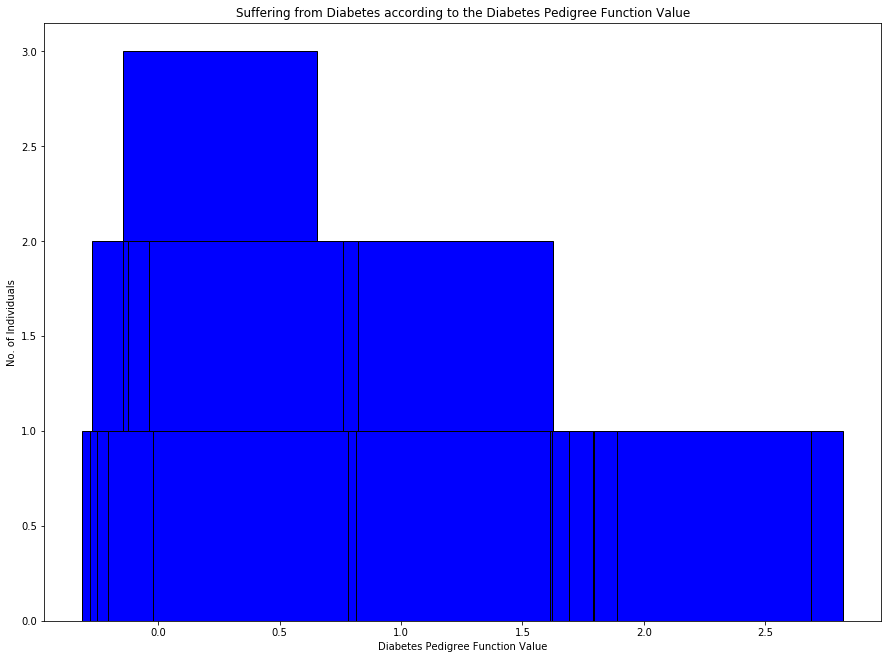

In [12]:
# Plotting the bar graph of people suffering from Diabetes according to their DiabetesPedigreeFunction Values

# Printing the DiabetesPedigreeFunction Groups with the count of cases for each groups
print(df['DiabetesPedigreeFunction'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['DiabetesPedigreeFunction'].value_counts().index, df['DiabetesPedigreeFunction'].value_counts().values, color='b', edgecolor='k')
plt.title('Suffering from Diabetes according to the Diabetes Pedigree Function Value')
plt.xlabel('Diabetes Pedigree Function Value')
plt.ylabel('No. of Individuals')
plt.show()

25    12
22    11
31    11
38    10
41     9
43     8
36     8
32     8
29     8
28     8
24     8
45     7
26     7
33     7
27     6
23     6
40     5
46     5
42     4
37     4
30     4
21     4
53     4
51     4
52     4
47     3
49     3
34     3
58     3
54     3
56     2
66     2
61     1
60     1
57     1
67     1
55     1
44     1
50     1
48     1
39     1
70     1
Name: Age, dtype: int64


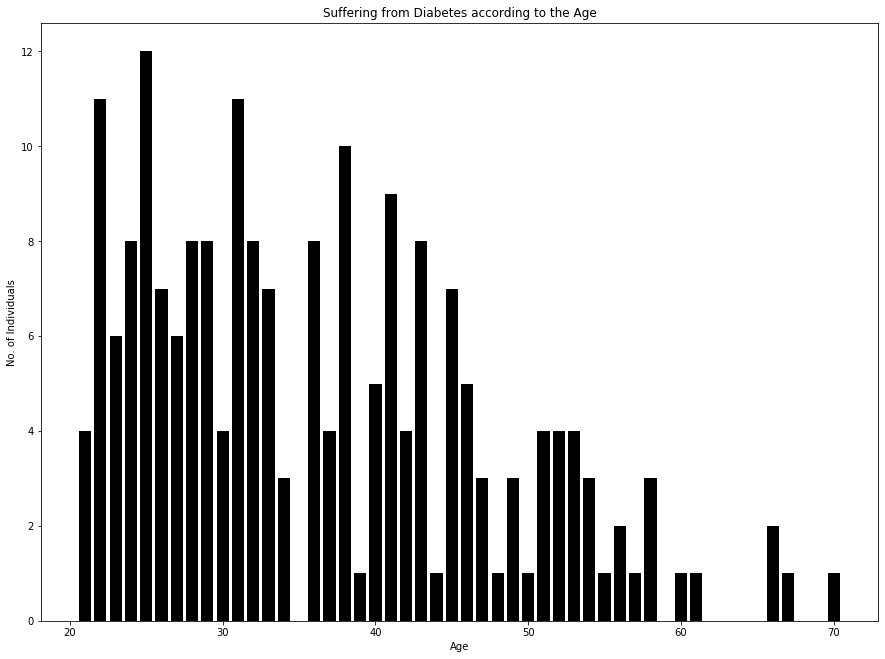

In [13]:
# Plotting the bar graph of people suffering from Diabetes according to their Age

# Printing the Age Groups with the count of cases for each groups
print(df['Age'].value_counts())

plt.figure(figsize=[15,11])
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values, color='k')
plt.title('Suffering from Diabetes according to the Age')
plt.xlabel('Age')
plt.ylabel('No. of Individuals')
plt.show()

### Step 2. Implementing KNN Algorithm

In [14]:
# dist() : function to calculate the distance between two numpy arrays (here, x1 and x2) - Euclidean distance

def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [15]:
# KNN Algorithm

def knn(X, Y, queryPoint, k=5):
    
    # Find out the K nearest neighbours
    vals = []
    m = X.shape[0]
    
    # 1st for each point in the X calculating the distance and put it and its class (0 or 1) into vals
    for i in range(m):
        d = dist(queryPoint, X[i])     # computing the distance
        vals.append((d, Y[i]))
    
    # Sorting the list according to the distances
    vals = sorted(vals)
    
    # Nearest/First K points
    vals = vals[:k]                 
    
    # Creating numpy array of the nearest K points
    vals = np.array(vals)
    
    # For Majority Vote {major no. of points class (0 or 1)}
    # We are using unique; here, it will create an array with unique values from an array. And, return_counts=True
    # will gives the count of each value {the whole statement will create an array containing 2 arrays}
    
    new_vals = np.unique(vals[:, 1], return_counts=True)
    
    # new_vals[1] will give the 2nd array inside new_vals array i.e., the count array
    # And argmax() will give the index of the maximum count
    index = new_vals[1].argmax()
    pred = new_vals[0][index]        # We are mapping the value {In unique values array} with the index of max count value
    
    return pred

### Step 3 : Making Predictions for Testing Data

In [16]:
# Importing Testing Data

dfx_test = pd.read_csv('./Diabetes Detection Datasets/Testing Data/Diabetes_XTest.csv')

print(dfx_test.shape, dfx_test.columns, dfx_test, sep='\n\n')

(192, 8)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              0      180             90             26       90  36.5   
1              2       93             64             32      160  38.0   
2              2      114             68             22        0  28.7   
3             13       76             60              0        0  32.8   
4              1       80             74             11       60  30.0   
..           ...      ...            ...            ...      ...   ...   
187           10      108             66              0        0  32.4   
188            3      130             64              0        0  23.1   
189            0      162             76             36        0  49.6   
190           12       84             72             31        0  29.7   
191            0       94

In [17]:
# Generating numpy array from the DataFrame

X_test = dfx_test.values
print(X_test, X_test.shape[0], sep='\n\n')

[[0.00e+00 1.80e+02 9.00e+01 ... 3.65e+01 3.14e-01 3.50e+01]
 [2.00e+00 9.30e+01 6.40e+01 ... 3.80e+01 6.74e-01 2.30e+01]
 [2.00e+00 1.14e+02 6.80e+01 ... 2.87e+01 9.20e-02 2.50e+01]
 ...
 [0.00e+00 1.62e+02 7.60e+01 ... 4.96e+01 3.64e-01 2.60e+01]
 [1.20e+01 8.40e+01 7.20e+01 ... 2.97e+01 2.97e-01 4.60e+01]
 [0.00e+00 9.40e+01 0.00e+00 ... 0.00e+00 2.56e-01 2.50e+01]]

192


In [18]:
# Making Predictions on some data : X_test

pred = []
for i in range(X_test.shape[0]):
    pred.append(int(knn(X_train, Y_train, X_test[i])))
    print(int(pred[i]))

print('\n Size :', len(pred))

1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
1
0

 Size : 192


In [19]:
# Saving the result in a DataFrame : dfy_test

dfy_test = dfx_test
dfy_test['Outcome'] = pred         # Adding Predictions to the given testing data as new column : Outcome

dfy_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,1
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,1
188,3,130,64,0,0,23.1,0.314,22,0
189,0,162,76,36,0,49.6,0.364,26,1
190,12,84,72,31,0,29.7,0.297,46,1


In [20]:
# Saving predictions as .csv for the Test cases given in the Testing Data, through the DataFrame created above

dfy_test.to_csv('./Diabetes Detection Datasets/Predictions/Diabetes_XTest_Predictions.csv', index=False, header=True)

In [21]:
# Checking the above created .csv file and its content by importing it

pd.read_csv('./Diabetes Detection Datasets/Predictions/Diabetes_XTest_Predictions.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,1
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,1
188,3,130,64,0,0,23.1,0.314,22,0
189,0,162,76,36,0,49.6,0.364,26,1
190,12,84,72,31,0,29.7,0.297,46,1
